In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Employee_Attendance.xlsx"
df = pd.read_excel(file_path)
df.head()

,EmployeeID,Department,Attendance,PerformanceScore
0,1,IT,30,81
1,2,Finance,17,88
2,3,HR,25,98
3,4,IT,11,81
4,5,IT,1,53


In [22]:
print(df.info())
print(df.describe())
print(df['Department'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Department        100 non-null    object
 2   Attendance        100 non-null    int64 
 3   PerformanceScore  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None
       EmployeeID  Attendance  PerformanceScore
count  100.000000  100.000000        100.000000
mean    50.500000   14.480000         74.400000
std     29.011492    9.405006         14.760718
min      1.000000    0.000000         50.000000
25%     25.750000    7.000000         60.750000
50%     50.500000   13.500000         77.000000
75%     75.250000   23.250000         86.000000
max    100.000000   30.000000         98.000000
Department
Finance    30
Sales      26
IT         24
HR         20
Name: count, dtype: int64


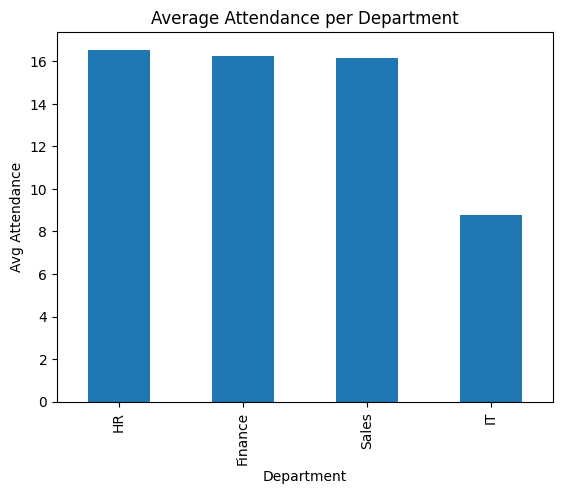

In [23]:
# Average attendance per department
attendance_dept = df.groupby('Department')['Attendance'].mean().sort_values(ascending=False)
attendance_dept.plot(kind='bar', title='Average Attendance per Department', ylabel='Avg Attendance')
plt.show()

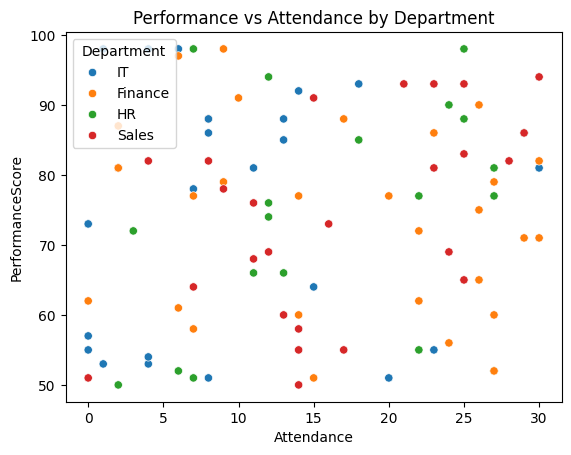

In [24]:
sns.scatterplot(data=df, x='Attendance', y='PerformanceScore', hue='Department')
plt.title('Performance vs Attendance by Department')
plt.show()

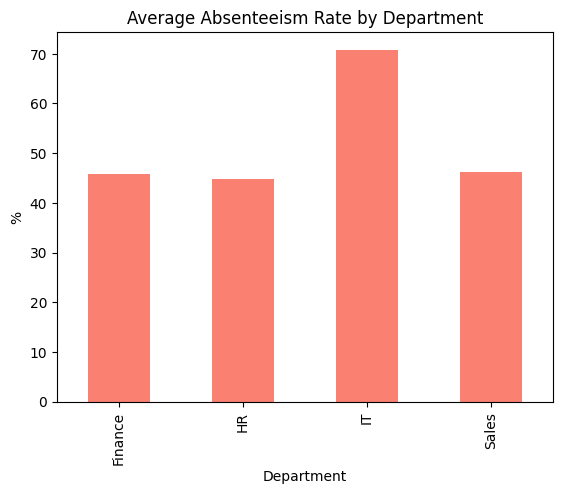

,EmployeeID,Department,Attendance,PerformanceScore,AbsenteeismRate
0,1,IT,30,81,0.00
1,2,Finance,17,88,43.33
2,3,HR,25,98,16.67
3,4,IT,11,81,63.33
4,5,IT,1,53,96.67


In [25]:
max_possible_days = df['Attendance'].max()  # or manually set e.g., 30 days
df['AbsenteeismRate'] = 100 - (df['Attendance'] / max_possible_days * 100)

absent_avg = df.groupby('Department')['AbsenteeismRate'].mean()
absent_avg.plot(kind='bar', color='salmon', title='Average Absenteeism Rate by Department', ylabel='%')
plt.show()
df['AbsenteeismRate'] = 100 - (df['Attendance'] / max_possible_days * 100)
df['AbsenteeismRate'] = df['AbsenteeismRate'].round(2)
df.head()

In [26]:
summary = df.groupby('Department').agg({
    'Attendance': ['mean', 'min', 'max'],
    'PerformanceScore': 'mean',
    'AbsenteeismRate': 'mean'
})
summary
print(summary)

           Attendance         PerformanceScore AbsenteeismRate
                 mean min max             mean            mean
Department                                                    
Finance     16.233333   0  30        74.466667       45.888000
HR          16.550000   2  29        74.400000       44.834000
IT           8.750000   0  30        74.416667       70.833333
Sales       16.153846   0  30        74.307692       46.153462
